## **Importing Libraries**

In [ ]:
import numpy as np 
import pandas as pd 
import math
import cv2
import matplotlib.pyplot as plt
import os
import seaborn as sns
import umap
from PIL import Image
from os.path import isfile, join
from collections import Counter
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import tensorflow as tf
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.utils.np_utils import to_categorical

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
Using TensorFlow backend.


## **Downloading the dataset**

In [ ]:
!pip install kaggle

In [ ]:
#Uploading my kaggle.json file
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"reshmaabraham97","key":"93708c9df70033e3984ebb5d5a78b613"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d jangedoo/utkface-new

 97% 321M/331M [00:06<00:00, 39.1MB/s]
100% 331M/331M [00:06<00:00, 49.6MB/s]


In [ ]:
!unzip utkface-new.zip

Streaming output truncated to the last 5000 lines.
  inflating: utkface_aligned_cropped/crop_part1/34_1_0_20170111182452832.jpg.chip.jpg  
  inflating: utkface_aligned_cropped/crop_part1/34_1_1_20170103230340961.jpg.chip.jpg  
  inflating: utkface_aligned_cropped/crop_part1/34_1_1_20170104011329697.jpg.chip.jpg  
  inflating: utkface_aligned_cropped/crop_part1/34_1_1_20170104165020320.jpg.chip.jpg  
  inflating: utkface_aligned_cropped/crop_part1/34_1_1_20170108230211421.jpg.chip.jpg  
  inflating: utkface_aligned_cropped/crop_part1/34_1_2_20170104022134829.jpg.chip.jpg  
  inflating: utkface_aligned_cropped/crop_part1/34_1_2_20170104023010725.jpg.chip.jpg  
  inflating: utkface_aligned_cropped/crop_part1/34_1_2_20170104172537171.jpg.chip.jpg  
  inflating: utkface_aligned_cropped/crop_part1/34_1_2_20170104201443273.jpg.chip.jpg  
  inflating: utkface_aligned_cropped/crop_part1/34_1_2_20170104204327523.jpg.chip.jpg  
  inflating: utkface_aligned_cropped/crop_part1/34_1_2_20170105164106

## **Loading Data**

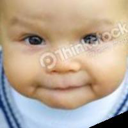

In [ ]:
im =Image.open('/content/UTKFace/1_0_0_20161219140623097.jpg.chip.jpg').resize((128,128))
im

In [ ]:
import os
onlyfiles = os.listdir("/content/UTKFace")
onlyfiles

['27_1_1_20170114030211993.jpg.chip.jpg',
 '22_1_4_20170103223002341.jpg.chip.jpg',
 '24_1_2_20170116174421540.jpg.chip.jpg',
 '42_0_1_20170113155108219.jpg.chip.jpg',
 '20_1_0_20170117141338600.jpg.chip.jpg',
 '27_1_4_20170103235051403.jpg.chip.jpg',
 '25_1_0_20170116220927378.jpg.chip.jpg',
 '28_1_0_20170117022353982.jpg.chip.jpg',
 '67_0_0_20170104213103526.jpg.chip.jpg',
 '30_1_4_20170117143625216.jpg.chip.jpg',
 '18_1_2_20170104020418380.jpg.chip.jpg',
 '60_0_0_20170104212114820.jpg.chip.jpg',
 '29_1_4_20170103180829632.jpg.chip.jpg',
 '27_0_1_20170117013659556.jpg.chip.jpg',
 '24_1_3_20170104222408639.jpg.chip.jpg',
 '12_0_4_20170103205745050.jpg.chip.jpg',
 '25_1_1_20170116003155558.jpg.chip.jpg',
 '26_1_3_20170119154424042.jpg.chip.jpg',
 '24_1_1_20170113000048018.jpg.chip.jpg',
 '2_0_0_20170110213234033.jpg.chip.jpg',
 '49_0_3_20170109011146753.jpg.chip.jpg',
 '23_0_0_20170117144618155.jpg.chip.jpg',
 '26_1_1_20170116164338305.jpg.chip.jpg',
 '6_1_0_20170109201925765.jpg.chip.

In [ ]:
len(onlyfiles)

23708

## **Preparing Data**

### **Preparing labels**

In [ ]:
#The labels of each face image is embedded in the file name, formated like **age_gender_race_[date&time].jpg**

gender = [i.split('_')[1] for i in onlyfiles]
classes = []
for i in gender:
    i = int(i)
    classes.append(i)  

In [ ]:
categorical_labels = to_categorical(classes, num_classes=2)
categorical_labels[:10]

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.]], dtype=float32)

### **Preparing Data**

In [ ]:
X_data =[]
for file in onlyfiles:
    face = cv2.imread("/content/UTKFace/"+file,cv2.IMREAD_COLOR)
    face = cv2.resize(face, (32,32) )
    X_data.append(face)
X_data=np.array(X_data)
X_data.shape

(23708, 32, 32, 3)

In [ ]:
# normalize data
X_data = X_data.astype('float32')
X_data /= 255

In [ ]:
X_train, X_valid, y_train, y_test = train_test_split(X_data, categorical_labels, test_size=0.5)
X_valid , X_test, y_valid, y_test = train_test_split(X_valid, y_test, test_size=0.5)

In [ ]:
print("X_train", X_train.shape)
print("X_valid", X_valid.shape)
print("X_test", X_test.shape)

X_train (11854, 32, 32, 3)
X_valid (5927, 32, 32, 3)
X_test (5927, 32, 32, 3)


## **CNN Model**

In [ ]:
model = tf.keras.Sequential()

# Must define the input shape in the first layer of the neural network
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=2, padding='same', activation='relu', input_shape=(32,32,3))) 
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.3))

model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.3))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(2, activation='sigmoid'))

# Take a look at the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 64)        832       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 32)        8224      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 8, 8, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 2048)              0

In [ ]:
model.compile(loss='binary_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [ ]:
model.fit(X_train,
         y_train,
         batch_size=64,
         epochs=45,
         validation_data=(X_valid,y_valid))

Epoch 1/45
186/186 [==============================] - 1s 7ms/step - loss: 0.6118 - accuracy: 0.6647 - val_loss: 0.5306 - val_accuracy: 0.7354
Epoch 2/45
186/186 [==============================] - 1s 6ms/step - loss: 0.4772 - accuracy: 0.7761 - val_loss: 0.4300 - val_accuracy: 0.8092
Epoch 3/45
186/186 [==============================] - 1s 6ms/step - loss: 0.4120 - accuracy: 0.8139 - val_loss: 0.3671 - val_accuracy: 0.8372
Epoch 4/45
186/186 [==============================] - 1s 6ms/step - loss: 0.3862 - accuracy: 0.8248 - val_loss: 0.3650 - val_accuracy: 0.8470
Epoch 5/45
186/186 [==============================] - 1s 6ms/step - loss: 0.3656 - accuracy: 0.8324 - val_loss: 0.3366 - val_accuracy: 0.8503
Epoch 6/45
186/186 [==============================] - 1s 6ms/step - loss: 0.3501 - accuracy: 0.8415 - val_loss: 0.3242 - val_accuracy: 0.8584
Epoch 7/45
186/186 [==============================] - 1s 6ms/step - loss: 0.3429 - accuracy: 0.8439 - val_loss: 0.3474 - val_accuracy: 0.8414
Epoch 

In [ ]:
score = model.evaluate(X_test, y_test, verbose=0)

# Print test accuracy
print('\n', 'Test accuracy:', score[1])


 Test accuracy: 0.8945503830909729


## **Saving the model and weights.**

In [ ]:
import json
from keras.models import load_model
from keras.models import model_from_json
from keras.preprocessing import image

model_json = model.to_json()
with open("model.json",'w') as json_file:
  json_file.write(model_json)

model.save('MyGenderModel.h5')

## **Loading the model and predicting the gender of uploaded image**

In [ ]:
from tensorflow.keras.models import load_model
loaded_model = load_model('MyGenderModel.h5')
loaded_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 64)        832       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 32)        8224      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 8, 8, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 2048)              0

In [ ]:
from google.colab import files
files.upload()

Saving woman1.jpg to woman1.jpg


{'woman1.jpg': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01\x01,\x01,\x00\x00\xff\xe1\x00\xf4Exif\x00\x00MM\x00*\x00\x00\x00\x08\x00\x04\x01\x0f\x00\x02\x00\x00\x00\x06\x00\x00\x00>\x01\x10\x00\x02\x00\x00\x00\x0e\x00\x00\x00D\x82\x9a\x00\x05\x00\x00\x00\x01\x00\x00\x00R\x87i\x00\x04\x00\x00\x00\x01\x00\x00\x00Z\x00\x00\x00\x00Canon\x00Canon EOS 70D\x00\x00\x00\x00\x01\x00\x00\x0c\x80\x00\x07\x82\x9a\x00\x05\x00\x00\x00\x01\x00\x00\x00\xb0\x82\x9d\x00\x05\x00\x00\x00\x01\x00\x00\x00\xb8\x88\'\x00\x03\x00\x00\x00\x02\x00d\x00\x00\x90\x03\x00\x02\x00\x00\x00\x14\x00\x00\x00\xc0\x92\t\x00\x03\x00\x00\x00\x02\x00\x10\x00\x00\x92\n\x00\x05\x00\x00\x00\x01\x00\x00\x00\xd4\xa44\x00\x02\x00\x00\x00\x10\x00\x00\x00\xdc\x00\x00\x00\x01\x00\x00\x0c\x80\x00\x00\x00\x12\x00\x00\x00\n2017:05:07 10:12:30\x00\x00\x00\x002\x00\x00\x00\x01EF50mm f/1.8 II\x00\xff\xdb\x00C\x00\x03\x02\x02\x02\x02\x02\x03\x02\x02\x02\x03\x03\x03\x03\x04\x06\x04\x04\x04\x04\x04\x08\x06\x06\x05\x06\t\x08\n\n\t\x08\t\t\n\x0

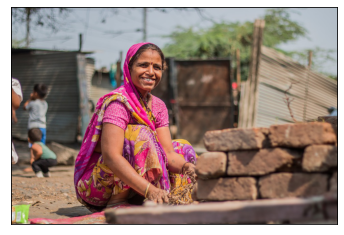

Predicted gender is Female


In [ ]:
img =Image.open('woman1.jpg').resize((32,32))
x_array = image.img_to_array(img)
x = np.expand_dims(x_array, axis = 0)
x /= 255
gender_prediction = np.argmax(loaded_model.predict(x))

show_img=Image.open('woman1.jpg')
plt.imshow(show_img)
plt.xticks([])
plt.yticks([])
plt.show()

print("Predicted gender is", "Male" if gender_prediction == True else "Female")

## **Using OpenCV and Haar Cascade File to check the gender in real time**

In [ ]:
face_haar_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')


cap=cv2.VideoCapture(0)

while True:
    ret,test_img=cap.read()# captures frame and returns boolean value and captured image
    if not ret:
        continue
    gray_img= cv2.cvtColor(test_img, cv2.COLOR_BGR2GRAY)

    faces_detected = face_haar_cascade.detectMultiScale(gray_img, 1.32, 5)


    for (x,y,w,h) in faces_detected:
        cv2.rectangle(test_img,(x,y),(x+w,y+h),(255,0,0),thickness=7)
        roi_gray=gray_img[y:y+w,x:x+h]#cropping region of interest i.e. face area from  image
        roi_gray=cv2.resize(roi_gray,(48,48))
        img_pixels = image.img_to_array(roi_gray)
        img_pixels = np.expand_dims(img_pixels, axis = 0)
        img_pixels /= 255

        predictions = loaded_model.predict(img_pixels)

        #find max indexed array
        max_index = np.argmax(predictions[0])

        gender = ('Female', 'Male')
        predicted_gender = gender[max_index]

        cv2.putText(test_img, predicted_gender, (int(x), int(y)), cv2.FONT_HERSHEY_SIMPLEX, 1, (0,0,255), 2)

    resized_img = cv2.resize(test_img, (1000, 700))
    cv2.imshow('Gender analysis ',resized_img)



    if cv2.waitKey(10) == ord('q'):#wait until 'q' key is pressed
        break

cap.release()
cv2.destroyAllWindows